In [94]:
import pandas as pd

In [95]:
df = pd.read_csv("dataset_sunny.csv")

In [96]:
df.head(20)

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [99]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')

In [100]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [101]:
X = df.drop('Play', axis=1)  
y = df['Play'] 

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model =CategoricalNB()
model.fit(X_train, y_train)


CategoricalNB()

In [103]:
y_pred = model.predict(X_test)

In [104]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6

Confusion Matrix:
 [[1 1]
 [1 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [105]:
input_data = {
        'Outlook': ['sunny'],
        'Temperature': ['hot'],
        'Humidity': ['high'],
        'Windy': ['True']
}
    
input_df = pd.DataFrame(input_data)


for column in input_df.columns:
    input_df[column] = label_encoders[column].transform(input_df[column])
prediction = model.predict(input_df)
    
decoded_prediction = label_encoders['Play'].inverse_transform(prediction)
    

In [106]:
print(decoded_prediction)

['no']


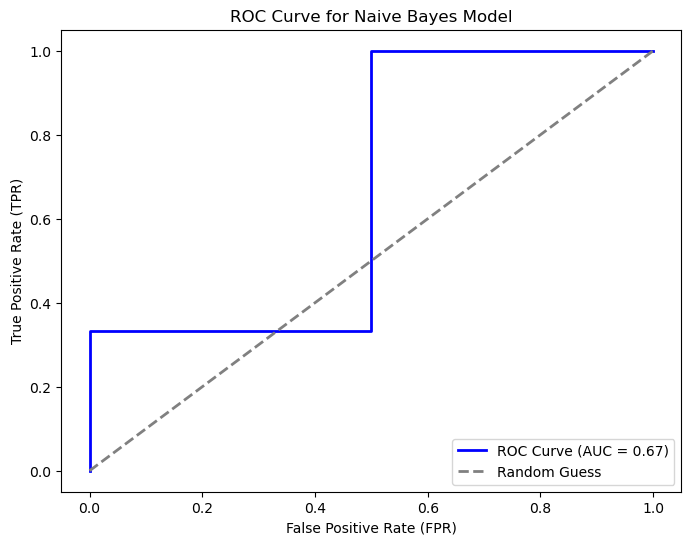

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend(loc='lower right')
plt.show()